<a href="https://colab.research.google.com/github/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/Cap02-Analise-Raio-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Prog-X Versão 1.0</font>
# <font color='blue'>Inteligência Artificial Para Análise de Imagens de Raio-X do Tórax e Detecção de Doenças Pulmonares</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.13


## Redes Neurais Convolucionais

Redes Neurais Convolucionais são redes neurais usadas principalmente para classificar imagens (ou seja, nomear o que vêem), agrupar imagens por similaridade (busca de fotos) e realizar o reconhecimento de objetos nas cenas.

Por exemplo, redes neurais convolucionais (ConvNets ou CNNs - Convolutional Neural Networks) são usadas para identificar rostos, indivíduos, placas de rua, tumores, ornitorrinco (ornitorrinco?) e muitos outros aspectos dos dados visuais.

A eficácia das redes convolucionais no reconhecimento de imagens é uma das principais razões pelas quais o mundo despertou para a eficácia da aprendizagem profunda (Deep Learning). Em certo sentido, as CNNs são a razão pela qual a aprendizagem profunda é famosa.

O sucesso de uma arquitetura convolucional profunda chamada AlexNet na competição ImageNet de 2012 foi o que começou a despertar a atenção do mundo. As CNNs estão impulsionando grandes avanços na Visão Computacional, que tem aplicações óbvias para carros autônomos, robótica, drones, segurança, diagnósticos médicos e tratamentos para deficientes visuais.

As redes convolucionais também podem executar tarefas mais banais (e mais lucrativas), orientadas para os negócios, como o reconhecimento óptico de caracteres (OCR) para digitalizar texto e possibilitar o processamento em linguagem natural em documentos analógicos e manuscritos, onde as imagens são símbolos a serem transcritos.

CNNs não se limitam ao reconhecimento de imagens, no entanto. Elas foram aplicadas diretamente à análise de texto. E eles são aplicados ao som quando é representado visualmente como um espectrograma e a representar graficamente dados com redes convolucionais de grafos.

## Imagens São Tensores 4-D?

As redes neurais convolucionais ingerem e processam imagens como tensores, e os tensores são matrizes de números com dimensões adicionais.

Eles podem ser difíceis de visualizar, então vamos abordá-los por analogia. Um escalar é apenas um número, como 7; um vetor é uma lista de números (por exemplo, [7,8,9]); e uma matriz é uma grade retangular de números que ocupa várias linhas e colunas como uma planilha.

Geometricamente, se um escalar é um ponto de dimensão zero, um vetor é uma linha unidimensional, uma matriz é um plano bidimensional, uma pilha de matrizes é um cubo tridimensional e quando cada elemento dessas matrizes tem uma pilha de mapas de recursos anexados a ele, você entra na quarta dimensão. A imagem abaixo resumo o conceito:

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/tensores.jpeg?raw=1)

Um tensor abrange as dimensões além do plano 2-D. Você pode facilmente imaginar um tensor tridimensional, com a matriz de números organizados em um cubo.

Os tensores são formados por matrizes aninhadas em matrizes e esse aninhamento pode continuar infinitamente, respondendo por um número arbitrário de dimensões muito maiores do que o que podemos visualizar espacialmente. Um tensor 4-D simplesmente substituiria cada um dos escalares por uma matriz aninhada um nível mais profundo. As redes convolucionais lidam com tensores 4-D como o abaixo.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/tensor4d.png?raw=1)

Com algumas ferramentas, você verá o NDArray usado como sinônimo de tensor ou matriz multidimensional. A dimensionalidade de um tensor (1,2,3… n) é chamada de ordem; isto é, um tensor de quinta ordem teria cinco dimensões.

A largura e a altura de uma imagem são facilmente entendidas. A profundidade é necessária devido ao modo como as cores são codificadas. A codificação Vermelho-Verde-Azul (RGB), por exemplo, produz uma imagem com três camadas de profundidade. Cada camada é chamada de "canal" e, por convolução, produz uma pilha de mapas de características (explicados abaixo), que existem na quarta dimensão. Recursos são apenas detalhes de imagens, como uma linha ou curva, das quais as redes convolucionais criam mapas.

Então, em vez de pensar nas imagens como áreas bidimensionais, nas redes convolucionais elas são tratadas como volumes quadridimensionais.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/tensor-slice.jpg?raw=1)

## O Que é Convolução?

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/tensorconv.png?raw=1)

Para fins matemáticos, uma convolução é a medida integral de quanto duas funções se sobrepõem quando uma passa sobre a outra. Pense em uma convolução como uma maneira de misturar duas funções, multiplicando-as.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convgaus.gif?raw=1)

No gif animado acima, a curva verde mostra a convolução das curvas azul e vermelha em função de t, a posição indicada pela linha verde vertical. A região cinza indica o produto g (tau) f (t-tau) como uma função de t, então sua área como uma função de t é precisamente a convolução.

Observe a curva alta e estreita do sino no meio do gráfico. A integral é a área sob essa curva. Próximo, há uma segunda curva de sino, mais curta e mais larga, flutuando lentamente do lado esquerdo do gráfico para a direita. O produto dessas duas funções se sobrepõe em cada ponto ao longo do eixo x é sua convolução. Então, de certa forma, as duas funções estão sendo “reunidas”.

A próxima coisa a entender sobre redes convolucionais é que elas passam muitos filtros por uma única imagem, cada uma captando um sinal diferente. Em uma camada bastante inicial, você pode imaginá-los passando um filtro de linha horizontal, um filtro de linha vertical e um filtro de linha diagonal para criar um mapa das bordas da imagem.

As redes convolucionais pegam esses filtros, fatias do espaço de destaque da imagem e os mapeiam um por um; isto é, eles criam um mapa de cada local em que esse recurso ocorre. Ao aprender diferentes partes de um espaço de recursos, as redes convolucionais permitem uma engenharia de recursos facilmente escalável e robusta.

Assim, as redes convolucionais realizam uma espécie de pesquisa. Imagine uma pequena lente de aumento deslizando da esquerda para a direita em uma imagem maior e recomeçando à esquerda quando chegar ao final de uma passagem (como as máquinas de escrever). Essa janela em movimento é capaz de reconhecer apenas uma coisa, digamos, uma pequena linha vertical. Três pixels escuros empilhados um sobre o outro. Ele move esse filtro de reconhecimento de linha vertical sobre os pixels reais da imagem, procurando correspondências.

Cada vez que uma correspondência é encontrada, ela é mapeada para um espaço de recurso específico para esse elemento visual. Nesse espaço, a localização de cada correspondência de linha vertical é registrada, um pouco como observadores de pássaros deixam pinos em um mapa para marcar onde viram pela última vez uma garça-real de grande azul. Uma rede convolucional realiza muitas e muitas buscas em uma única imagem - linhas horizontais, diagonais, tantas quanto houver elementos visuais a serem procurados.

As redes convolucionais realizam mais operações de entrada do que apenas as próprias convoluções.

Após uma camada convolucional, a entrada é passada através de uma transformação não linear, como tanh ou unidade linear retificada, que esmagará os valores de entrada em um intervalo entre -1 e 1.

Convolutional Network gif: https://mathworld.wolfram.com/Convolution.html

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/conv.png?raw=1)

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convnetl.png?raw=1)

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/feature_hierarchy.png?raw=1)

## Como Funcionam as Redes Neurais Convolucionais

Uma Rede Neural Convolucional (ConvNet / CNN) é um algoritmo de Aprendizado Profundo que pode captar uma imagem de entrada, atribuir importância (pesos e vieses que são aprendidos no treinamento) a vários aspectos / objetos da imagem e ser capaz de diferenciar um do outro.

O pré-processamento necessário em uma ConvNet é muito menor em comparação com outros algoritmos de classificação. Enquanto nos métodos primitivos os filtros são projetados manualmente, com treinamento suficiente, as ConvNets têm a capacidade de aprender esses filtros / características.

A arquitetura de uma ConvNet é análoga à do padrão de conectividade dos neurônios no cérebro humano e foi inspirada pela organização do córtex visual. Neurônios individuais respondem a estímulos apenas em uma região restrita do campo visual, conhecida como Campo Receptivo. Uma coleção desses campos se sobrepõe para cobrir toda a área visual.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/cnn-arquitetura1.jpeg?raw=1)

## Recursos e Mapas de Atributos

Uma imagem nada mais é do que uma matriz de valores de pixels, certo? Então, por que não achatar a imagem (por exemplo, matriz de imagem 3x3 em um vetor 9x1) e alimentá-la em uma rede neural? Sim, é isso que fazemos.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convnet1.png?raw=1)

Uma ConvNet é capaz de capturar com sucesso as dependências espaciais e temporais em uma imagem através da aplicação de filtros relevantes. A arquitetura executa um melhor ajuste ao conjunto de dados da imagem devido à redução no número de parâmetros envolvidos e na reutilização de pesos. Em outras palavras, a rede pode ser treinada para entender melhor a sofisticação da imagem.

Na figura abaixo, temos uma imagem RGB que foi separada por seus três planos de cores - vermelho, verde e azul.

Existem vários desses espaços de cores nos quais as imagens são criadas - Escala de cinza, RGB, HSV, CMYK, etc.

Você pode imaginar como as coisas seriam intensivamente computacionais quando as imagens atingissem dimensões, digamos 8K (7680 × 4320). O papel da ConvNet é reduzir as imagens para um formato mais fácil de processar, sem perder recursos essenciais para obter uma boa previsão. Isso é importante quando devemos projetar uma arquitetura que não seja apenas boa em aprender recursos, mas também seja escalável para conjuntos de dados maciços.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convnet2.png?raw=1)

Coonsidere uma imagem com dimensões = 5 (altura) x 5 (largura) x 1 (número de canais, por exemplo, RGB).

Na demonstração abaixo, a seção verde se assemelha à nossa imagem de entrada 5x5x1.

O elemento envolvido na execução da operação de convolução na primeira parte de uma Camada Convolucional é chamado Kernel / Filtro, K, representado na cor amarela. Selecionamos K como uma matriz 3x3x1.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convnet3.gif?raw=1)

O Kernel se desloca 9 vezes por causa do Comprimento da passada (stride) = 1, sempre executando uma operação de multiplicação de matrizes entre K e a parte P da imagem sobre a qual o kernel está passando.

O filtro se move para a direita com um certo valor de passada até analisar a largura completa. Seguindo em frente, ele pula para o início (esquerda) da imagem com o mesmo valor de passada e repete o processo até que toda a imagem seja percorrida.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convnet4.gif?raw=1)

No caso de imagens com vários canais (por exemplo, RGB), o Kernel tem a mesma profundidade que a da imagem de entrada. A multiplicação de matrizes é realizada entre as pilhas Kn e In ([K1, I1]; [K2, I2]; [K3, I3]) e todos os resultados são somados com o viés para nos fornecer uma saída de recurso de um canal compactado de uma profundidade.

O objetivo da operação de convolução é extrair os recursos de alto nível, como bordas, da imagem de entrada. ConvNets não precisam ser limitados a apenas uma Camada Convolucional. Convencionalmente, a primeira ConvLayer é responsável por capturar os recursos de baixo nível, como bordas, cores, orientação de gradiente, etc. de imagens no conjunto de dados, semelhante a como faríamos.

Existem dois tipos de resultados para a operação - um no qual o recurso envolvido é reduzido em dimensionalidade em comparação com a entrada e o outro no qual a dimensionalidade é aumentada ou permanece a mesma. Isso é feito aplicando Preenchimento (padding) válido no caso do primeiro, ou Mesmo Preenchimento (padding) no caso do último.

No caso de uma CNN, a convolução é realizada nos dados de entrada com o uso de um filtro ou kernel (esses termos são usados de forma intercambiável) para produzir um Mapa de Recursos.

Executamos uma convolução deslizando o filtro sobre a entrada. Em todos os locais, uma multiplicação de matrizes é realizada e soma o resultado no Mapa de Recursos.

Na animação abaixo, você pode ver a operação de convolução. Você pode ver o filtro (o quadrado verde) deslizando sobre nossa entrada (o quadrado azul) e a soma da convolução entra no Mapa de Recursos (o quadrado vermelho).

A área do nosso filtro também é chamada de campo receptivo, em homenagem às células dos neurônios! O tamanho desse filtro é 3x3.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/convnet5.gif?raw=1)

## Max Pooling/Downsampling

Semelhante à camada convolucional, a camada Pooling é responsável por reduzir o tamanho espacial do recurso envolvido.
Isso é para diminuir a potência computacional necessária para processar os dados através da redução de dimensionalidade. Além disso, é útil para extrair características dominantes que são invariantes rotacionais e posicionais, mantendo assim o processo de treinamento eficaz do modelo.

Existem dois tipos de pool: Pool Máximo (Max Pooling) e Pool Médio (Average Pooling). Max Pooling retorna o valor máximo da parte da imagem coberta pelo Kernel. Por outro lado, o Average Pooling retorna a média de todos os valores da parte da imagem coberta pelo Kernel.

O pool é uma maneira de capturar imagens grandes e reduzi-las enquanto preserva as informações mais importantes. A matemática por trás do pool é no nível básico. Consiste em passar uma pequena janela pela imagem e obter o valor máximo da janela em cada etapa. Na prática, uma janela de 2 ou 3 pixels em um lado e etapas de 2 pixels funcionam bem.

Após o agrupamento, uma imagem possui cerca de um quarto dos pixels iniciados. Como mantém o valor máximo de cada janela, preserva os melhores ajustes de cada recurso dentro da janela. Isso significa que ele não se importa exatamente onde o recurso se encaixa, desde que se encaixe em algum lugar dentro da janela. O resultado disso é que as CNNs podem descobrir se um recurso está em uma imagem sem se preocupar com a localização. Isso ajuda a resolver o problema dos computadores serem hiperliterais.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/cnn-arquitetura2.jpeg?raw=1)

O Max Pooling também funciona como um supressor de ruído. Ele descarta completamente as ativações ruidosas e também realiza a remoção do ruído junto com a redução da dimensionalidade. Por outro lado, o Average Pooling simplesmente realiza a redução da dimensionalidade como um mecanismo de supressão de ruído. Portanto, podemos dizer que o Max Pooling tem um desempenho muito melhor que o Average Pooling.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/pooling.png?raw=1)

A camada convolucional e a camada de pooling formam juntas a i-ésima camada de uma rede neural convolucional.

Dependendo das complexidades nas imagens, o número de camadas pode ser aumentado para capturar detalhes de níveis ainda mais baixos, mas ao custo de mais poder computacional.

Após seguir o processo acima, habilitamos o modelo com sucesso para entender os recursos. Continuando, vamos nivelar a saída final e alimentá-la com uma Rede Neural regular para fins de classificação.

## Por Que Usamos as Funções de Ativação?

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/cnn-arquitetura1.jpeg?raw=1)

Um participante pequeno, mas importante nesse processo, é a Função de Ativação, sendo a Unidade Linear Retificada ou ReLU a mais usada em Deep Learning atualmente. A matemática também é muito simples - onde quer que um número negativo ocorra, troque-o por um 0. Isso ajuda a CNN a manter-se matematicamente saudável, evitando que os valores aprendidos fiquem presos perto de 0 ou explodam em direção ao infinito. É a "graxa de eixo" das CNNs - não particularmente fascinante, mas sem ela as redes não vão muito longe.

A função de ativação é um nó que é colocado no final ou entre as camadas. A função de ativação é a transformação não linear que fazemos sobre o sinal de entrada. Essa saída transformada é então enviada para a próxima camada de neurônios como entrada.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/act-func.png?raw=1)

Temos diferentes tipos de funções de ativação, sendo a Unidade Linear Retificada (ReLU) a mais comum em CNNs.

Uma das maiores vantagens da ReLU em relação a outras funções de ativação é que ela não ativa todos os neurônios ao mesmo tempo. Na imagem da função ReLU acima, notamos que ela converte todas as entradas negativas em zero e o neurônio não é ativado. Isso a torna muito eficiente em termos computacionais, pois poucos neurônios são ativados por vez. Não satura na região positiva. Na prática, a ReLU converge seis vezes mais rápido que as funções de ativação tanh e sigmóide.

Algumas desvantagens que ReLU apresenta é que ela está saturada na região negativa, significando que o gradiente nessa região é zero. Com o gradiente igual a zero, durante a retropropagação, todos os pesos não serão atualizados; para corrigir isso, podemos usar a Leaky ReLU. Além disso, as funções ReLU não são centralizadas em zero. Isso significa que, para chegar ao seu ponto ideal, ela precisará usar um caminho em zig-zag que pode ser mais longo.

## Camada Totalmente Conectada

Nesta camada, os neurônios têm uma conexão completa com todas as ativações das camadas anteriores. Suas ativações podem, portanto, ser calculadas com uma multiplicação de matrizes seguida por um deslocamento de polarização. Esta é a última fase para uma rede CNN.

A Rede Neural Convolucional é na verdade composta de camadas ocultas e camadas totalmente conectadas.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/fc.jpeg?raw=1)

Adicionar uma camada totalmente conectada é uma maneira (geralmente) barata de aprender combinações dos recursos de alto nível, conforme representado pela saída da camada convolucional.

Agora que convertemos nossa imagem de entrada em um formato adequado de vários níveis, achataremos a imagem em um vetor de coluna. A saída achatada é alimentada a uma rede neural feed-forward e o backpropagation é aplicado a todas as iterações do treinamento. Ao longo de uma série de épocas, o modelo é capaz de distinguir entre certos recursos de baixo nível e recursos dominantes nas imagens e classificá-los usando a técnica de Classificação Softmax. Na prática, essa etapa final é um modelo de Machine Learning para Classificação, que recebe como entrada os recursos aprendidos nas camadas convolução.

## Treinamento e Backpropagation

Você pode ter ficado como muitas perguntas durante as aulas anteriores:

- Como os filtros na primeira camada convolucional sabem procurar arestas e curvas?
- Como a camada totalmente conectada sabe quais mapas de atributos devem ser usados?
- Como os filtros em cada camada sabem quais valores devem ser usados?

A maneira como o computador é capaz de ajustar seus valores (ou pesos) de filtro é através de um processo de treinamento chamado retropropagação ou Backpropagation.

Antes de começarmos a retropropagação, precisamos primeiro dar um passo atrás e falar sobre o que uma rede neural precisa para funcionar.

No momento em que todos nascemos, nossas mentes estavam frescas. Não sabíamos o que era um gato, cachorro ou pássaro. De maneira semelhante, antes do início do treinamento da CNN, os pesos ou valores do filtro são escolhidos de forma aleatória, pois ainda não sabemos quais são os melhores valores. Isso é o que a rede vai aprender.

Os filtros não sabem procurar arestas e curvas. Os filtros nas camadas superiores não sabem procurar patas e bicos.

No entanto, à medida que vamos para a escola, nossos pais e professores nos mostram fotos e imagens diferentes e nos dão um rótulo correspondente. Essa ideia de receber uma imagem e um rótulo é o processo de treinamento pelo qual as CNNs passam.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/cnn_example.png?raw=1)

Assim, o treinamento da rede neural pode ser separado em 4 seções distintas:

- Passagem para frente (feed-forward)
- Função de perda (loss function)
- Passagem para trás (backpropagation)
- Atualização de peso

Para começar, você pega uma imagem de treinamento que, como sabemos, é uma matriz de números de 32 x 32 x 3 e a passa por toda a rede.

Em nosso primeiro exemplo de treinamento, como todos os pesos ou valores de filtro foram inicializados aleatoriamente, a saída provavelmente será algo como [.1 .1 .1 .1 .1 .1 .1 .1 .1 .1 .1], basicamente um saída que não dá preferência a nenhum número em particular.

A rede, com seus pesos atuais, não é capaz de procurar esses recursos de baixo nível ou, portanto, não é capaz de chegar a uma conclusão razoável sobre qual poderia ser a classificação.

Isso vai para a parte da função de perda da retropropagação. Lembre-se de que o que estamos usando agora são dados de treinamento. Esses dados têm uma imagem e um rótulo. Digamos, por exemplo, que a primeira imagem de treinamento inserida foi um 3. O rótulo da imagem seria [0 0 0 1 0 0 0 0 0 0 0]. Uma função de perda pode ser definida de várias maneiras diferentes, mas uma comum é MSE (erro quadrático médio), que é ½ vezes (previsto atualmente) ao quadrado.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/mse.png?raw=1)

Como você pode imaginar, a perda será extremamente alta para as duas primeiras imagens de treinamento. Agora, vamos pensar sobre isso intuitivamente. Queremos chegar a um ponto em que o rótulo previsto (saída da ConvNet) seja o mesmo que o rótulo de treinamento (isso significa que nossa rede acertou sua previsão). Para chegar lá, queremos minimizar a quantidade de perdas (erros). Visualizando isso como apenas um problema de otimização no cálculo, queremos descobrir quais entradas (pesos no nosso caso) contribuíram mais diretamente para a perda (ou erro) da rede. E então atualizamos os pesos para a próxima passada. Repetimos esse processo dezenas, centenas ou milhares de vezes até que o aprendizado aconteça.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/back.png?raw=1)

Isso é o equivalente matemático de um dL/dW em que W são os pesos em uma camada específica. Agora, o que queremos fazer é realizar uma passagem reversa pela rede, que determina quais pesos contribuíram mais para a perda e encontrar maneiras de ajustá-los para que a perda diminua. Depois de calcularmos essa derivada, passamos para a última etapa, que é a atualização de peso. É aqui que pegamos todos os pesos dos filtros e os atualizamos para que eles mudem na direção oposta do gradiente.

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/pesos.png?raw=1)

A taxa de aprendizado (learning rate) é um parâmetro escolhido pelo Cientista de Dados. Uma alta taxa de aprendizado significa que são tomadas medidas maiores nas atualizações de peso e, portanto, pode levar menos tempo para o modelo convergir para um conjunto ideal de pesos. No entanto, uma taxa de aprendizado muito alta pode resultar em saltos muito grandes e pouco precisos para atingir o ponto ideal.

O processo de passagem para frente, função de perda, passagem para trás e atualização de parâmetros (pesos) é uma iteração de treinamento. O programa repetirá esse processo para um número fixo de iterações para cada conjunto de imagens de treinamento (geralmente chamado de lote). Depois de concluir a atualização do parâmetro no último exemplo de treinamento, esperamos que a rede seja treinada o suficiente para que os pesos das camadas sejam ajustados corretamente.

## Arquitetura Final das Convnets

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/final.png?raw=1)

Referências:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6108980/

https://cs231n.github.io/convolutional-networks/

## Definição do Projeto

Como a ferramenta de exame mais comum na prática médica, a radiografia de tórax tem um valor clínico importante no diagnóstico de doenças. Assim, a detecção automática de doenças com base na radiografia de tórax se tornou um dos tópicos mais procurados na pesquisa de imagens médicas.

A radiografia de tórax (ou radiografia torácica) é uma técnica de diagnóstico e imagem médica econômica e fácil de usar. A técnica é a ferramenta de diagnóstico mais utilizada na prática médica e tem um papel importante no diagnóstico de doenças pulmonares. Radiologistas bem treinados usam raios-X do tórax para detectar doenças, como pneumonia, tuberculose e câncer de pulmão precoce. Em inglês é conhecido como Chest radiography (chest X-ray or CXR).

As grandes vantagens dos raios-X do tórax incluem seu baixo custo e fácil operação. Mesmo em áreas subdesenvolvidas, as modernas máquinas de radiografia digital são muito acessíveis. A radiografia de tórax contém uma grande quantidade de informações sobre a saúde de um paciente. No entanto, interpretar corretamente as informações é sempre um grande desafio para o médico. A sobreposição das estruturas dos tecidos na radiografia de tórax aumenta muito a complexidade da interpretação. Aqui um exemplo de diferentes doenças do pulmão:

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/projeto-img1.png?raw=1)

**Detecção de Tuberculose**

A tuberculose (TB) é a nona principal causa de morte no mundo e a principal causa de um único agente infeccioso, acima do HIV / AIDS. Globalmente, em 2016, a proporção de pessoas que desenvolveram tuberculose e morreram da doença (taxa de letalidade, CFR) foi de 16%, o que significa que cerca de 10,4 milhões de pessoas (90% adultos; 65% homens; 10% pessoas vivendo com HIV) adoeceu com TB.

Detectar tuberculose em radiografia torácica é uma tarefa difícil, pois apresenta manifestações diferentes.

Manifestações anormais de tuberculose frequentemente afetam a textura e a geometria dos pulmões nas radiografias, como consolidações e infiltrações, variando de padrões sutis a derrames óbvios. Abaixo uma imagem de pulmão com tuberculose:

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/TB.png?raw=1)


Nosso trabalho neste projeto será treinar um modelo com imagens de pulmões saudáveis e com tuberculose para que o modelo seja capaz de fazer a detectação em novas imagens.

Referências:

<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3876596/">Pulmonary tuberculosis as differential diagnosis of lung cancer</a>

<a href="https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002686">Deep learning for chest radiograph diagnosis: A retrospective comparison of the CheXNeXt algorithm to practicing radiologists</a>

<a href="https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/s12938-018-0544-y">Computer-aided detection in chest radiography based on artificial intelligence: a survey</a>

## Coletando e Compreendendo os Dados de Imagens de Pulmões Saudáveis e Doentes

Os seguintes conjuntos de dados de imagem não identificados de radiografias de tórax (CXRs) estão disponíveis para a comunidade de pesquisa. Ambos os conjuntos contêm raios-X normais e anormais, com os últimos contendo manifestações de tuberculose.

**Conjunto de raios-X do Condado de Montgomery**: As imagens de raios-X deste conjunto de dados foram adquiridas no programa de controle da tuberculose do Departamento de Saúde e Serviços Humanos do Condado de Montgomery, MD, EUA. Este conjunto contém 138 radiografias póstero-anteriores, das quais 80 radiografias são normais e 58 radiografias são anormais com manifestações de tuberculose. Todas as imagens são anônimas e estão disponíveis no formato DICOM. O conjunto cobre uma ampla variedade de anormalidades, incluindo derrames e padrões miliares. O conjunto de dados inclui leituras de radiologia disponíveis como um arquivo de texto.

**Conjunto de raios X do Hospital de Shenzhen**: As imagens de raios X deste conjunto de dados foram coletadas pelo Hospital de Shenzhen em Shenzhen, providência em Guangdong, China. Os raios X foram adquiridos como parte dos cuidados de rotina no Hospital de Shenzhen. O conjunto contém imagens no formato JPEG. Existem 326 radiografias normais e 336 radiografias anormais, mostrando várias manifestações de tuberculose.

Fonte de Dados:

https://lhncbc.nlm.nih.gov/publication/pub9931

As imagens já estão disponíveis no servidor da DSA.

## Instalando e Carregando os Pacotes

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [49]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [50]:
# Pacote para uso da linha de comando
!pip install -q -U prompt_toolkit

In [51]:
# Imports

# Imports para manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Imports para manipulação de imagens
import os
import cv2
import itertools
import shutil
import imageio
import skimage
import skimage.io
import skimage.transform
from pathlib import Path

# Imports para Deep Learning
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.metrics import binary_accuracy

# Imports para cálculo de métricas e outras tarefas
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [52]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "ProgX-IA Academy" --iversions

Author: ProgX-IA Academy

matplotlib: 3.10.0
cv2       : 4.12.0
sklearn   : 1.6.1
tensorflow: 2.18.0
imageio   : 2.37.0
sys       : 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
skimage   : 0.25.2
google    : 2.0.3
numpy     : 2.0.2
keras     : 3.8.0
pandas    : 2.2.2



## Checando o Hardware Disponível no Servidor da DSA - CPU e GPUs

In [53]:
# Lista todos os dispositivos disponiveis
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1674059425566026599
xla_global_id: -1
]


> Se por acaso não aparecer para você todas as GPUs, reinstale o TensorFlow:

In [8]:
# pip uninstall tensorflow
# pip install tensorflow

In [54]:
import tensorflow as tf
print("Número Disponível de GPUs: ", len(tf.config.experimental.list_physical_devices('GPU')))

Número Disponível de GPUs:  0


In [10]:
# Lista o código de cada GPU
tf.config.list_physical_devices('GPU')

[]

## Visão Geral do Processo de Construção da Rede Neural Convolucional

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/mnist.png?raw=1)

In [11]:
# Carrega o dataset de imagens de dígitos manuscritos. Ao executar o comando, ele retorna 4 valores divididos entre dados de treino e dados de teste

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2


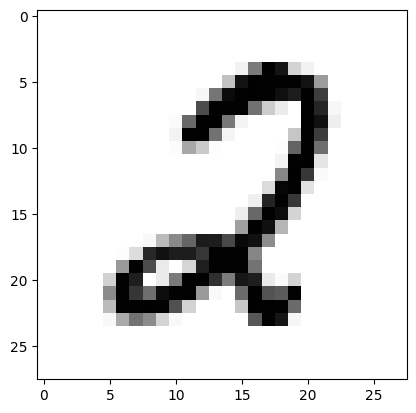

In [12]:
# Visualiza uma imagem
image_index = 7787 # Pode escolher qualquer valor até 60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap = 'Greys')

In [13]:
# Shape
x_train.shape

(60000, 28, 28)

In [14]:
# Reshape do array no formato 4-D
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [15]:
# Precisamos passar os valores como tipo float para ter a precisão decimal nas operações
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
# Normaliza os dados colocando tudo na mesma escala
x_train /= 255
x_test /= 255

In [17]:
# Print
print('Shape de x_train:', x_train.shape)
print('Número de imagens em x_train', x_train.shape[0])
print('Número de imagens em x_test', x_test.shape[0])

Shape de x_train: (60000, 28, 28, 1)
Número de imagens em x_train 60000
Número de imagens em x_test 10000


In [18]:
# Criando o modelo
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compilação e treinamento
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
 928/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8516 - loss: 0.4741

KeyboardInterrupt: 

In [ ]:
# Avaliação
model.evaluate(x_test, y_test)

> Previsão de uma nova imagem.

In [ ]:
# Busca uma imagem qualquer
image_index = 4345

# Desenha a imagem na tela
plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'Greys')

In [ ]:
# Usa o modelo treinado para prever a classe da imagem
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('\nA imagem acima é o número:', pred.argmax())

## Passo1 - Montagem do Drive e Definindo o Local de Armazenamento das Imagens de Raio-X

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Lista o conteúdo do diretório
#os.listdir('/media/datasets/IAMED/Cap02')

os.listdir('/content/drive/MyDrive/DataSets-IA/Torax/ChinaSet_AllFiles/CXR_png')


['CHNCXR_0001_0.png',
 'CHNCXR_0004_0.png',
 'CHNCXR_0005_0.png',
 'CHNCXR_0006_0.png',
 'CHNCXR_0328_1.png',
 'CHNCXR_0007_0.png',
 'CHNCXR_0008_0.png',
 'CHNCXR_0009_0.png',
 'CHNCXR_0329_1.png',
 'CHNCXR_0330_1.png',
 'CHNCXR_0331_1.png',
 'CHNCXR_0332_1.png',
 'CHNCXR_0010_0.png',
 'CHNCXR_0012_0.png',
 'CHNCXR_0333_1.png',
 'CHNCXR_0013_0.png',
 'CHNCXR_0334_1.png',
 'CHNCXR_0335_1.png',
 'CHNCXR_0336_1.png',
 'CHNCXR_0014_0.png',
 'CHNCXR_0015_0.png',
 'CHNCXR_0337_1.png',
 'CHNCXR_0338_1.png',
 'CHNCXR_0016_0.png',
 'CHNCXR_0017_0.png',
 'CHNCXR_0339_1.png',
 'CHNCXR_0018_0.png',
 'CHNCXR_0019_0.png',
 'CHNCXR_0020_0.png',
 'CHNCXR_0341_1.png',
 'CHNCXR_0022_0.png',
 'CHNCXR_0342_1.png',
 'CHNCXR_0021_0.png',
 'CHNCXR_0023_0.png',
 'CHNCXR_0024_0.png',
 'CHNCXR_0025_0.png',
 'CHNCXR_0026_0.png',
 'CHNCXR_0027_0.png',
 'CHNCXR_0028_0.png',
 'CHNCXR_0029_0.png',
 'CHNCXR_0343_1.png',
 'CHNCXR_0344_1.png',
 'CHNCXR_0030_0.png',
 'CHNCXR_0031_0.png',
 'CHNCXR_0032_0.png',
 'CHNCXR_0

In [6]:
# Diretórios para os 2 grupos de imagens
#imagens_shen = '/media/datasets/IAMED/Cap02/ChinaSet_AllFiles/CXR_png/'
#imagens_mont = '/media/datasets/IAMED/Cap02/MontgomerySet/CXR_png/'

imagens_shen = '/content/drive/MyDrive/DataSets-IA/Torax/ChinaSet_AllFiles/CXR_png/'
imagens_mont = '/content/drive/MyDrive/DataSets-IA/Torax/MontgomerySet/CXR_png/'


In [31]:
# Print do tamanho de cada pasta
print(len(os.listdir(imagens_mont)))
print(len(os.listdir(imagens_shen)))


139
663


In [11]:
# Grava na sessão a lista de imagens em cada variável
# Imports para manipulação de imagens
import os
import pandas as pd
shen_image_list = os.listdir(imagens_shen)
mont_image_list = os.listdir(imagens_mont)

## Passo 2 - Preparando e Carregando as Imagens de Raio-X

In [12]:
# Prepara e cria os dataframes com as listas das imagens, com identificação da coluna
df_shen = pd.DataFrame(shen_image_list, columns = ['image_id'])
df_mont = pd.DataFrame(mont_image_list, columns = ['image_id'])

In [16]:
df_shen.head()

,image_id
0,CHNCXR_0001_0.png
1,CHNCXR_0004_0.png
2,CHNCXR_0005_0.png
3,CHNCXR_0006_0.png
4,CHNCXR_0328_1.png


In [26]:
# Remove da lista o nome 'Thumbs.db'. Geralmente todo diretório com imagens contém esse arquivo

df_shen = df_shen[df_shen['image_id'] != 'Thumbs.db']
df_mont = df_mont[df_mont['image_id'] != 'Thumbs.db']

In [27]:
# Reset do índice para e evitar erros mais tarde
df_shen.reset_index(inplace = True, drop = True)
df_mont.reset_index(inplace = True, drop = True)

In [28]:
# Print do Shape
print(df_shen.shape)

(662, 2)


In [29]:
# Print do Shape
print(df_mont.shape)

(138, 2)


In [30]:
# Visualiza os dados. O padrão da nomenclatura é chnc + indice + 0 ou 1 (normal ou doente)
df_shen.head()

,image_id,target
0,CHNCXR_0001_0.png,Normal
1,CHNCXR_0004_0.png,Normal
2,CHNCXR_0005_0.png,Normal
3,CHNCXR_0006_0.png,Normal
4,CHNCXR_0328_1.png,Tuberculose


In [31]:
# Visualiza os dados. O padrão da nomenclatura é mcuc + indice + 0 ou 1 (normal ou doente)
df_mont.head()

,image_id,target
0,MCUCXR_0001_0.png,Normal
1,MCUCXR_0002_0.png,Normal
2,MCUCXR_0003_0.png,Normal
3,MCUCXR_0004_0.png,Normal
4,MCUCXR_0005_0.png,Normal


## Lab 1 - Extraindo a Variável Target(SAÍDA = Tuberculose ou Normal)

In [32]:
# Criando a função para selecionar o 4º(iniciando com 0 de tráz para frente = -5) índice no final da string (nome do arquivo)
# Exemplo: CHNCXR_0470_1.png --> 1 é o label, significa que Tuberculose está presente na imagem.

def extrair_target(x):

    target = int(x[-5])

    if target == 0:
        return 'Normal'
    if target == 1:
        return 'Tuberculose'

In [33]:
# Executando um loop através do apply no dataFrame e adicionando uma nova coluna com label target com o
# conteúdo(Tuberculose ou Normal)  aos dataframe
df_shen['target'] = df_shen['image_id'].apply(extrair_target)
df_mont['target'] = df_mont['image_id'].apply(extrair_target)

In [34]:
# Visualiza os dados
df_shen.head()

,image_id,target
0,CHNCXR_0001_0.png,Normal
1,CHNCXR_0004_0.png,Normal
2,CHNCXR_0005_0.png,Normal
3,CHNCXR_0006_0.png,Normal
4,CHNCXR_0328_1.png,Tuberculose


In [35]:
# Visualiza os dados
df_mont.head()

,image_id,target
0,MCUCXR_0001_0.png,Normal
1,MCUCXR_0002_0.png,Normal
2,MCUCXR_0003_0.png,Normal
3,MCUCXR_0004_0.png,Normal
4,MCUCXR_0005_0.png,Normal


In [36]:
# Shenzen Dataset
df_shen['target'].value_counts()

,count
target,
Tuberculose,336
Normal,326


In [37]:
# Montgomery Dataset
df_mont['target'].value_counts()

,count
target,
Normal,80
Tuberculose,58


## Lab 1 - Visualizando as Imagens

In [55]:
# Função para visualizar as imagens
# col_name = Variável                                                 ----> target
# figure_cols = Qtd colunas em cada linha                             ----> 4
# df = nome do data frame que representa o conjunto de dados          ----> df_shen
# caminho_imagens = Variavel onde estão os arquivos físicos as imagens ----> imagens_shen

def visualiza_images(col_name, figure_cols, df, caminho_imagens):

    # Define as categorias criando e agrupando por indices(Tuberculose e Normal)
    categories = (df.groupby([col_name])[col_name].nunique()).index

    # Prepara os subplots
    f, ax = plt.subplots(nrows = len(categories),
                         ncols = figure_cols,
                         figsize = (4 * figure_cols, 4 * len(categories)))

    # Desenha as imagens
    for i, cat in enumerate(categories):

        # Extrai uma amostra
        sample = df[df[col_name] == cat].sample(figure_cols)

        # Loop pelas colunas da figura
        for j in range(0, figure_cols):

            # Extrai o nome da imagem
            file = caminho_imagens + sample.iloc[j]['image_id']

            # Lê a imagem do disco
            im = imageio.imread(file)

            # Mostra a imagem em gray (preto e branco)
            ax[i, j].imshow(im, resample = True, cmap = 'gray')
            ax[i, j].set_title(cat, fontsize = 14)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-55-375538503.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(file)


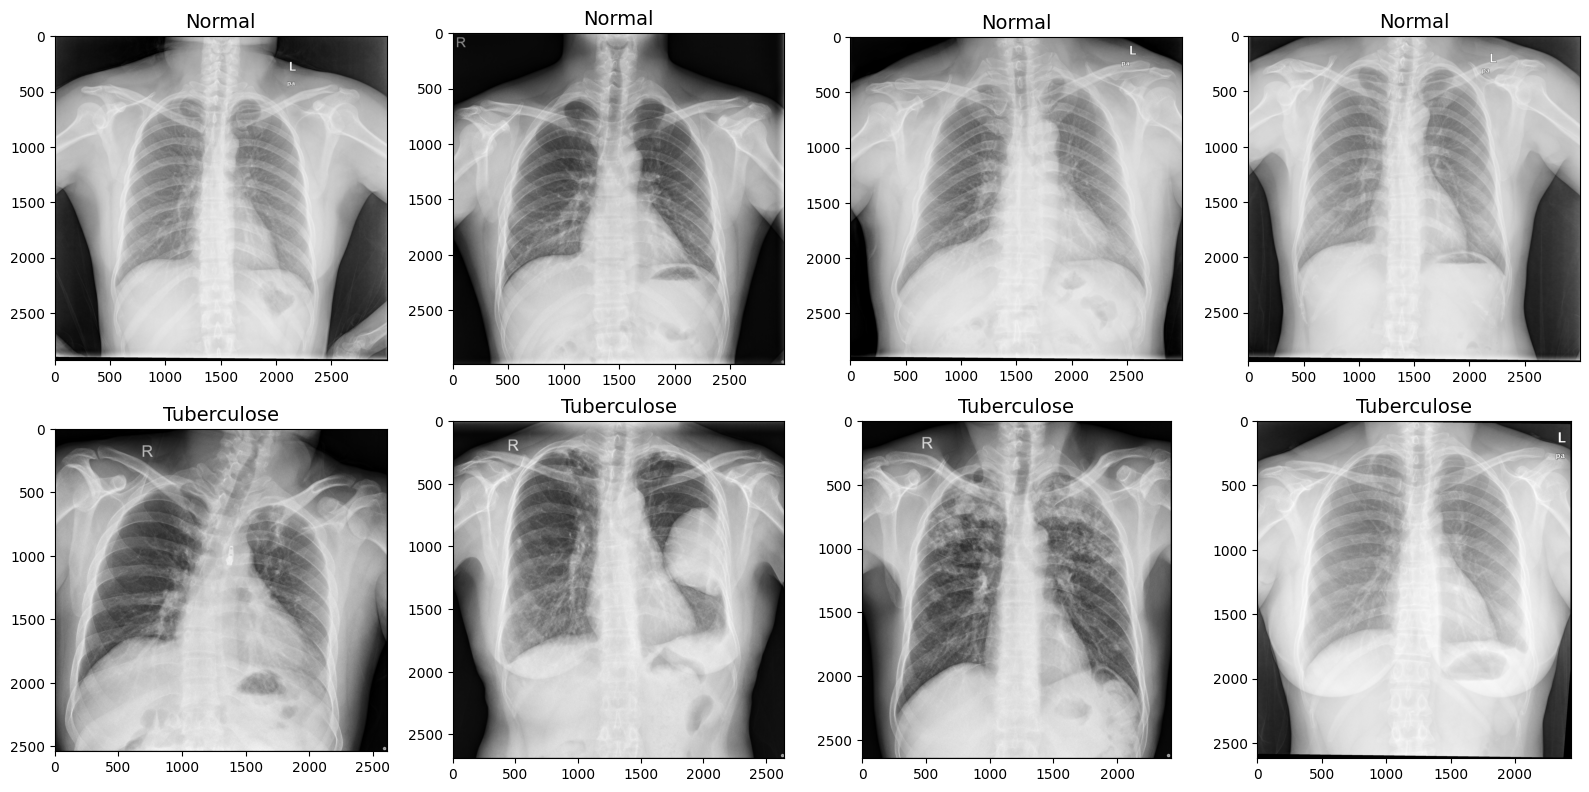

In [57]:
# Shenzen Dataset - Testado OK
visualiza_images('target', 4, df_shen, imagens_shen)

/tmp/ipython-input-55-375538503.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(file)


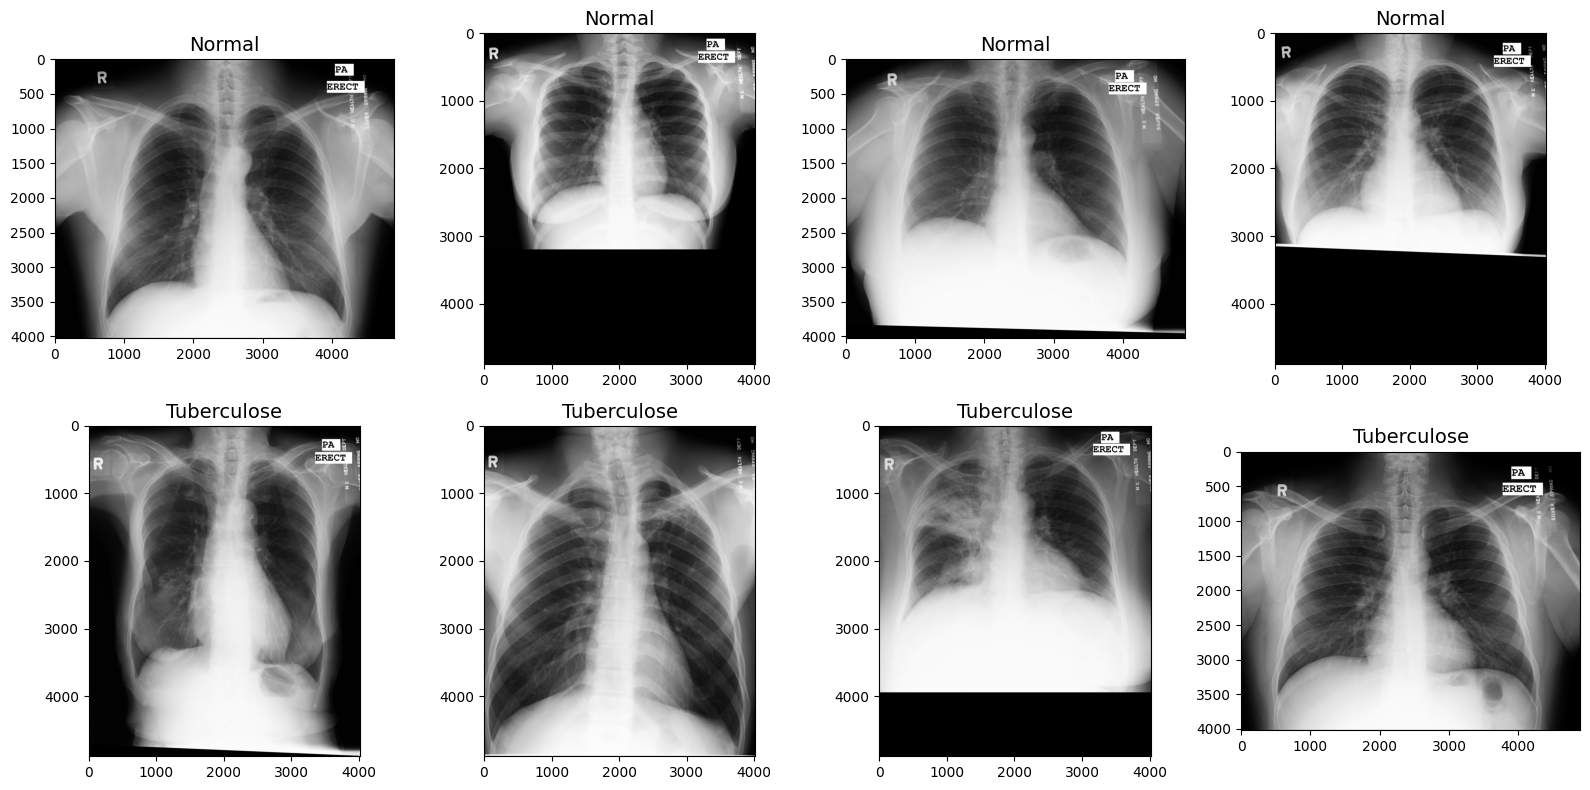

In [58]:
# Montgomery Dataset - Testado OK
visualiza_images('target', 4, df_mont, imagens_mont)

## Lab 1 - Ajustando e Organizando o Primeiro Dataset de Imagens de Raio-X

In [59]:
# Função para fazer a leitura e extração dos metadados das imagens
def leitura_imagens(file_name):

    # Leitura da imagem
    image = cv2.imread(caminho_imagens + file_name)

    # Extração do número máximo e mínimo de pixels
    max_pixel_val = image.max()
    min_pixel_val = image.min()

    # image.shape[0] - largura da imagem
    # image.shape[1] - altura da imagem
    # image.shape[2] - número de canais
    # Se o shape não tiver um valor para num_channels (altura, largura) então atribuímos 1 ao número de canais.
    if len(image.shape) > 2:
        output = [image.shape[0], image.shape[1], image.shape[2], max_pixel_val, min_pixel_val]
    else:
        output = [image.shape[0], image.shape[1], 1, max_pixel_val, min_pixel_val]
    return output

In [60]:
# Define o caminho onde estão as imagens
caminho_imagens = imagens_shen

In [63]:
# Executando um loop através do apply no dataFrame "leitura_imagens"
# image_id - Representa o nome do arquivo que iremos extrair os metadados
# np.stack - Retorna os metadados das imagens organizados

meta_shen = np.stack(df_shen['image_id'].apply(leitura_imagens))

In [64]:
# Grava o resultado em outro dataframe com a extração dos metadados 'largura', 'altura', 'canais', ...
df = pd.DataFrame(meta_shen, columns = ['largura', 'altura', 'canais', 'maior_valor_pixel', 'menor_valor_pixel'])

In [65]:
# Concatena com o dataset atual
df_shen = pd.concat([df_shen, df], axis = 1, sort = False)

In [66]:
# Shape
df_shen.shape

(662, 7)

In [67]:
# Visualiza
df_shen.head()

,image_id,target,largura,altura,canais,maior_valor_pixel,menor_valor_pixel
0,CHNCXR_0001_0.png,Normal,2919,3000,3,255,0
1,CHNCXR_0004_0.png,Normal,2933,3000,3,255,0
2,CHNCXR_0005_0.png,Normal,2933,3000,3,255,0
3,CHNCXR_0006_0.png,Normal,2948,2775,3,255,0
4,CHNCXR_0328_1.png,Tuberculose,2939,2985,3,255,0


In [68]:
# Não precisamos mais desse dataframe. Removemos para liberar espaço na memória RAM.
del df

## Lab 1 - Ajustando e Organizando o Segundo Dataset de Imagens de Raio-X

In [69]:
# Define o caminho onde estão as imagens
caminho_imagens = imagens_mont

In [70]:
# Retorna os metadados das imagens
meta_mont = np.stack(df_mont['image_id'].apply(leitura_imagens))

In [71]:
# Grava o resultado em um dataframe
df = pd.DataFrame(meta_mont, columns = ['largura', 'altura', 'canais', 'maior_valor_pixel', 'menor_valor_pixel'])

In [72]:
# Concatena com o dataset atual
df_mont = pd.concat([df_mont, df], axis = 1, sort = False)

In [73]:
# Visualiza
df_mont.head()

,image_id,target,largura,altura,canais,maior_valor_pixel,menor_valor_pixel
0,MCUCXR_0001_0.png,Normal,4020,4892,3,255,0
1,MCUCXR_0002_0.png,Normal,4020,4892,3,255,0
2,MCUCXR_0003_0.png,Normal,4892,4020,3,255,0
3,MCUCXR_0004_0.png,Normal,4892,4020,3,255,0
4,MCUCXR_0005_0.png,Normal,4892,4020,3,255,0


In [74]:
# Não precisamos mais desse dataframe. Removemos para liberar espaço na memória RAM.
del df

## Lab 1 - Redimensionamento das Imagens

**Por Que Precisamos do Redimensionamento e Como Funciona?**

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/resize.jpeg?raw=1)

![title](https://github.com/WMCOSTA/IA-Medicina/blob/main/3-AnaliseImagensMedicas/2-RedesNeuraisDeepLearning/50-Lab1/Classification/imagens/inter.png?raw=1)

https://www.cambridgeincolour.com/

https://www.cambridgeincolour.com/tutorials/image-interpolation.htm

https://docs.opencv.org/4.2.0/da/d6e/tutorial_py_geometric_transformations.html

Vejamos um exemplo do que representa o redimensionamento de imagens.

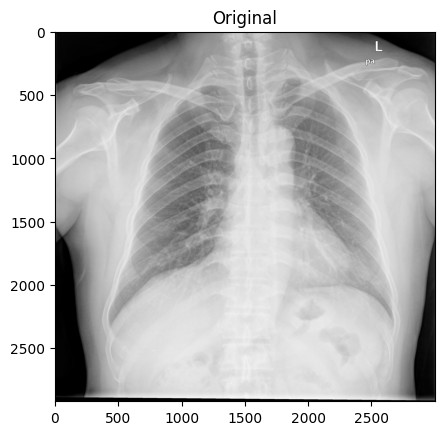

In [42]:
# RECUPERANDO A Imagem origina do repositório No Github para testar o REDIMENSIONAMENTO

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Imagem original recuperada do repositório do Github
image1 = cv2.imread("/content/drive/MyDrive/DataSets-IA/Torax/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png")
plt.title("Original")
plt.imshow(image1)



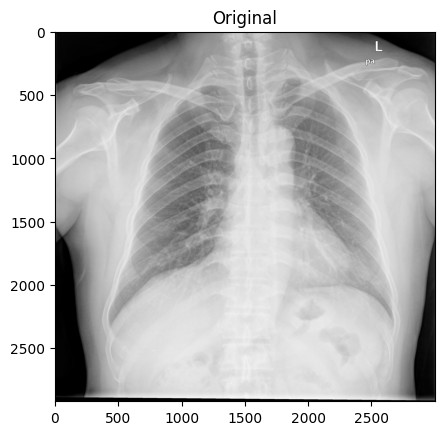

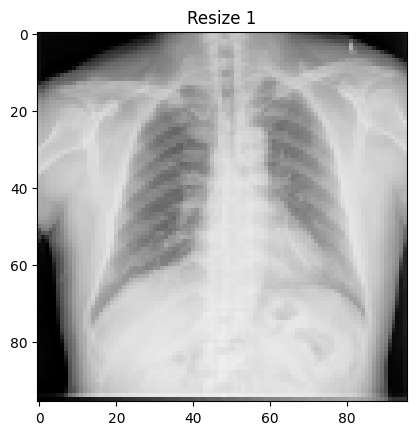

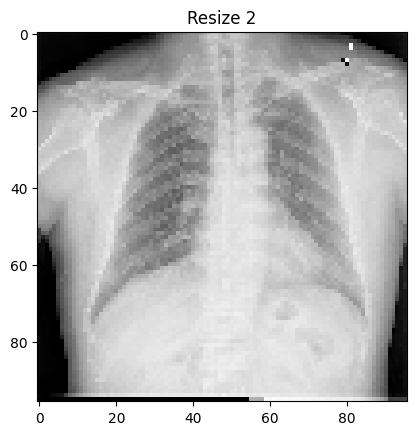

In [62]:
##### Esta célula é apenas um exemplo DE COMO IREMOS APLICAR O REDIMENSIONAMENTO EM TODOS AS IMAGENS #####

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Imagem original
image1 = cv2.imread("/content/drive/MyDrive/DataSets-IA/Torax/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png")

# Imagem usando interporlação INTER_AREA
image2 = cv2.resize(image1, (96, 96), interpolation = cv2.INTER_AREA)

# Imagem usando interporlação INTER_LINEAR
image3 = cv2.resize(image1, (96, 96), interpolation = cv2.INTER_LINEAR)

# Plot
plt.title("Original")
plt.imshow(image1)
plt.show()

plt.title("Resize 1")
plt.imshow(image2)
plt.show()

plt.title("Resize 2")
plt.imshow(image3)
plt.show()

OBSERVAÇÃO::: Para aplicar o redimensionamento vamos primeiro concatenar os dataframes com os dados e metadados das imagens e fazer a separação de classes antes de aplicar o redimensionamento a todas as imagens.

## Lab 1 - Divisão dos Dados em Treino e Validação

Tarefas que serão realizadas para o treinamento do modelo:

- 1. Concatenar os datasets de imagens
- 2. "Embaralhar" as imagens
- 3. Separar as imagens por classes (Normal / Tuberculose)
- 4. Dividir os dados em treino e validação/teste
- 5. Aplicar as técnicas de processamento de imagens (como redimensionamento) em treino e validação/teste de forma separada

In [73]:
# Total de registros do Dataset "df_shen"
df_shen['target'].value_counts()

,count
target,
Tuberculose,336
Normal,326


In [74]:
# Total de registros do Dataset "df_mont"
df_mont['target'].value_counts()

,count
target,
Normal,80
Tuberculose,58


In [2]:
# Vamos combinar/juntar os 2 dataframes criando apenas um.
#  axis = 0 - Indica junção por coluna

df_data = pd.concat([df_shen, df_mont], axis = 0).reset_index(drop = True)

NameError: name 'pd' is not defined

In [76]:
# E "embaralhar (shuffle)" os dados
df_data = shuffle(df_data)

In [77]:
# Shape
df_data.shape

(800, 7)

In [78]:
# Visualiza os dados
df_data.head()

,image_id,target,largura,altura,canais,maior_valor_pixel,menor_valor_pixel
88,CHNCXR_0372_1.png,Tuberculose,2949.0,3000.0,3.0,255.0,0.0
11,CHNCXR_0332_1.png,Tuberculose,2639.0,2749.0,3.0,255.0,0.0
589,CHNCXR_0253_0.png,Normal,2939.0,3000.0,3.0,255.0,0.0
236,CHNCXR_0521_1.png,Tuberculose,2954.0,2678.0,3.0,255.0,0.0
25,CHNCXR_0339_1.png,Tuberculose,2493.0,2573.0,3.0,255.0,0.0


In [79]:
# Cria uma nova coluna chamada 'labels' que mapeia as classes(Normal ou Tuberculose) para valores binários (0 ou 1)
# O algoritmo trata números e não label

df_data['labels'] = df_data['target'].map({'Normal':0, 'Tuberculose':1})

In [80]:
# Visualiza os dados
df_data.head()

,image_id,target,largura,altura,canais,maior_valor_pixel,menor_valor_pixel,labels
88,CHNCXR_0372_1.png,Tuberculose,2949.0,3000.0,3.0,255.0,0.0,1
11,CHNCXR_0332_1.png,Tuberculose,2639.0,2749.0,3.0,255.0,0.0,1
589,CHNCXR_0253_0.png,Normal,2939.0,3000.0,3.0,255.0,0.0,0
236,CHNCXR_0521_1.png,Tuberculose,2954.0,2678.0,3.0,255.0,0.0,1
25,CHNCXR_0339_1.png,Tuberculose,2493.0,2573.0,3.0,255.0,0.0,1


In [81]:
# Shape
df_data.shape

(800, 8)

In [1]:
# Definimos y (saída)
y = df_data['labels']

NameError: name 'df_data' is not defined

In [ ]:
# Definimos dados de treino e validação
df_treino, df_val = train_test_split(df_data, test_size = 0.15, random_state = 101, stratify = y)

In [ ]:
# Print
print(df_treino.shape)
print(df_val.shape)

In [ ]:
# Total de registros
df_treino['target'].value_counts()

In [ ]:
# Total de registros
df_val['target'].value_counts()

## Lab 1 - Separando as Imagens Organizadas Por Classe

In [ ]:
# Cria um novo diretório que servirá como base
base_dir = '/home/dmpm/FIAMED/IAMED/Cap02/dados/'

# Criamos o PATH (caminho)
dir_base = Path(base_dir)

# Verificamos se o diretório já existe e se não existir, criamos
if dir_base.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(base_dir)

Criaremos as pastas abaixo no diretório base:

- dados_treino/
    - Normal
    - Tuberculose
    
    
- dados_val/
    - Normal
    - Tuberculose

In [ ]:
# Preparamos a criação do diretório com dados de treino
dados_treino = os.path.join(base_dir, 'dados_treino/')

# Criamos o PATH (caminho)
dir_treino = Path(dados_treino)

# Verificamos se o diretório já existe e se não existir, criamos
if dir_treino.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(dados_treino)

In [ ]:
# Preparamos a criação do diretório com dados de validação
dados_val = os.path.join(base_dir, 'dados_val/')

# Criamos o PATH (caminho)
dir_val = Path(dados_val)

# Verificamos se o diretório já existe e se não existir, criamos
if dir_val.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(dados_val)

In [ ]:
# Diretório para imagens de raio-x Normais para treinamento
Normal = os.path.join(dados_treino, 'Normal')

# Criamos o PATH (caminho)
dir_normal_treino = Path(Normal)

# Verificamos se o diretório já existe e se não existir, criamos
if dir_normal_treino.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(Normal)

In [ ]:
# Diretório com imagens de raio-x com Tuberculose para treinamento
Tuberculose = os.path.join(dados_treino, 'Tuberculose')

# Criamos o PATH (caminho)
dir_tb_treino = Path(Tuberculose)

# Verificamos se o diretório já existe e se não existir, criamos
if dir_tb_treino.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(Tuberculose)

In [ ]:
# Diretório com imagens de raio-x Normais para validação
Normal = os.path.join(dados_val, 'Normal')

# Criamos o PATH (caminho)
dir_normal_val = Path(Normal)

# Verificamos se o diretório já existe
if dir_normal_val.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(Normal)

In [ ]:
# Diretório com imagens de raio-x com Tuberculose para validação
Tuberculose = os.path.join(dados_val, 'Tuberculose')

# Criamos o PATH (caminho)
dir_tb_val = Path(Tuberculose)

# Verificamos se o diretório já existe
if dir_tb_val.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(Tuberculose)

Agora devemos ajustar os índices.

In [ ]:
# Define o image_id como o índice em df_data
df_data.set_index('image_id', inplace = True)

In [ ]:
# Checamos df_data
df_data.head()

In [ ]:
# Obtém uma lista de imagens em cada uma das duas pastas originais
folder_1 = os.listdir(imagens_shen)
folder_2 = os.listdir(imagens_mont)

In [ ]:
folder_1[1:10]

In [ ]:
folder_2[1:10]

In [ ]:
# Obtém uma lista de imagens de treino e validação
lista_imagens_treino = list(df_treino['image_id'])
lista_imagens_val = list(df_val['image_id'])

In [ ]:
lista_imagens_treino[20:30]

In [ ]:
lista_imagens_val[10:20]

Observe que as pastas de treino e validação tem as imagens dois dois datasets originais.

## Lab 1 - Pré-Processamento das Imagens

In [ ]:
# Resize das imagens
IMAGE_HEIGHT = 96
IMAGE_WIDTH = 96

Agora copiamos as imagens separadas por classe, redimensionamos e organizamos no novo diretório.

In [ ]:
# Transfere as imagens de treino pré-processadas para o novo diretório

print('\nPré-processamento dos dados de treino! Aguarde...')

# Loop pela lista de imagens de treino
for image in lista_imagens_treino:

    # Nome da imagem
    fname = image

    # Label da imagem
    label = df_data.loc[image,'target']

    # Percorremos a folder_1 (imagens do dataset de shenzen) para buscar o caminho da imagem
    if fname in folder_1:

        # Diretório fonte da imagem
        src = os.path.join(imagens_shen, fname)

        # Diretório destino da imagem
        dst = os.path.join(dados_treino, label, fname)

        # Copia a imagem
        image = cv2.imread(src)

        # Aplica o redimensionamento
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Salva a imagem no diretório de destino
        cv2.imwrite(dst, image)

    # Percorremos a folder_2 (imagens do dataset de montgomery) para buscar o caminho da imagem
    if fname in folder_2:

        # Diretório fonte da imagem
        src = os.path.join(imagens_mont, fname)

        # Diretório destino da imagem
        dst = os.path.join(dados_treino, label, fname)

        # Copia a imagem
        image = cv2.imread(src)

        # Aplica o redimensionamento
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Salva a imagem no diretório de destino
        cv2.imwrite(dst, image)

print('\nOs dados de treino estão prontos!')

In [ ]:
# Transfere as imagens de validação pré-processadas para o novo diretório

print('\nPré-processamento dos dados de valiação/teste! Aguarde...')

# Loop pela lista de imagens de validação/teste
for image in lista_imagens_val:

    # Nome da imagem
    fname = image

    # Label da imagem
    label = df_data.loc[image,'target']

    # Percorremos a folder_1 (imagens do dataset de shenzen) para buscar o caminho da imagem
    if fname in folder_1:

        # Diretório fonte da imagem
        src = os.path.join(imagens_shen, fname)

        # Diretório destino da imagem
        dst = os.path.join(dados_val, label, fname)

        # Copia a imagem
        image = cv2.imread(src)

        # Aplica o redimensionamento
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Salva a imagem no diretório de destino
        cv2.imwrite(dst, image)

    # Percorremos a folder_2 (imagens do dataset de montgomery) para buscar o caminho da imagem
    if fname in folder_2:

        # Diretório fonte da imagem
        src = os.path.join(imagens_mont, fname)

        # Diretório destino da imagem
        dst = os.path.join(dados_val, label, fname)

        # Copia a imagem
        image = cv2.imread(src)

        # Aplica o redimensionamento
        image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Salva a imagem no diretório de destino
        cv2.imwrite(dst, image)

print('\nOs dados de validação/teste estão prontos!')

In [ ]:
# Verificamos quantas imagens de treino temos em cada pasta de classe
print(len(os.listdir(dados_treino + '/Normal')))
print(len(os.listdir(dados_treino + '/Tuberculose')))

In [ ]:
# Verificamos quantas imagens de validação temos em cada pasta de classe
print(len(os.listdir(dados_val + '/Normal')))
print(len(os.listdir(dados_val + '/Tuberculose')))

## Lab 1 - Dataset Augmentaion (Geração de Imagens Sintéticas)

Para Deep Learning mostrar seu valor precisamos de um grande volume de dados. E coletar mais dados é um processo demorado e que envolve custo.

Uam alternativa, é criar dados sintéticos. Por exemplo: tomamos uma imagem original e aplicamos um flip (giro) de 15 graus na imagem e criamos uma nova imagem. Teremos o mesmo tipo de imagem, mas com uma leve modificação no formato. Essa técnica é chamada de Dataset Augmentation e é amplamente usada em Inteligência Artificial para suprir a carência de dados em volume suficiente.

Criaremos imagens sintéticas, armazenaremos em pastas juntamente com as imagens originais e depois as alimentaremos nos geradores de batches para o treinamento. Trabalhar dessa maneira acelera o processo de treinamento.

In [ ]:
# Lista de classes
class_list = ['Normal', 'Tuberculose']

In [ ]:
# Número de imagens sintéticas desejadas
NUM_IMAGENS_SINTETICAS = 1000

In [ ]:
# Cria imagens sintéticas para aumentar o volume de dados de treino (não fazemos isso com dados de validação/teste)

print('\nGeração de imagens sintéticas para treinamento! Aguarde...\n')

# Loop pelas imagens de cada classe
for item in class_list:

    # Estamos criando diretório temporário aqui porque o excluiremos posteriormente.
    # Criamos um diretório base
    aug_dir = base_dir + 'temp/'
    os.mkdir(aug_dir)

    # Criamos um diretório dentro do diretório base para armazenar imagens da mesma classe
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Escolhe a classe
    img_class = item

    # Listamos todas as imagens no diretório
    img_list = os.listdir(dados_treino + img_class)

    # Copiamos imagens do diretório de treino para a classe no loop, para o img_dir
    for fname in img_list:

            # Diretório fonte da imagem
            src = os.path.join(dados_treino + img_class, fname)

            # Diretório destino da imagem
            dst = os.path.join(img_dir, fname)

            # Copia a imagem da fonte para o destino
            shutil.copyfile(src, dst)


    # Apontamos para o diretório contendo as imagens que foram copiadas
    path = aug_dir
    save_path = dados_treino + img_class

    # Criamos um gerador de imagens
    datagen = ImageDataGenerator(rotation_range = 10,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                 zoom_range = 0.1,
                                 horizontal_flip = True,
                                 fill_mode = 'nearest')

    # Tamanho do batch
    batch_size = 50

    # Geração de dados
    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir = save_path,
                                              save_format = 'png',
                                              target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
                                              batch_size = batch_size)


    # Geramos as imagens aumentadas e adicionamos às pastas de treinamento
    num_files = len(os.listdir(img_dir))

    # Aqui criamos uma quantidade semelhante de imagens para cada classe
    num_batches = int(np.ceil((NUM_IMAGENS_SINTETICAS - num_files) / batch_size))

    # Executa o gerador e cria imagens aumentadas
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # Exclui o diretório temporário com os arquivos de imagem brutos
    shutil.rmtree(aug_dir)

print('\nOs dados foram criados com sucesso!')

In [ ]:
# Verificamos quantas imagens de treino temos agora em cada pasta.
# Estas são as imagens originais mais as imagens sintéticas.
print(len(os.listdir(dados_treino + 'Normal')))
print(len(os.listdir(dados_treino + 'Tuberculose')))

In [ ]:
# Verifica quantas imagens de validação temos em cada pasta (deve ser o mesmo número inicial)
# Estas são as imagens originais mais as imagens sintéticas.
print(len(os.listdir(dados_val + 'Normal')))
print(len(os.listdir(dados_val + 'Tuberculose')))

Vamos visualizar algumas imagens sintéticas.

In [ ]:
# Função para o plot de algumas imagens
def plots(ims, figsize = (20,10), rows = 5, interp = False, titles = None):

    # Obtém a imagem
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))

    # Define o tamanho da figura
    f = plt.figure(figsize = figsize)

    # Colunas
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    # Plot
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [ ]:
# Executa a função
plots(imgs, titles = labels)

Podemos agora construir o modelo.

## Lab 1 - Construção do Modelo

Variáveis para definir as amostras nos batches de dados.

In [ ]:
len(df_treino)

In [ ]:
len(df_val)

In [ ]:
# Número de exemplos de treinamento
num_amostras_treino = len(df_treino)

# Número de exemplos de validação
num_amostras_val = len(df_val)

# Tamanho do batch de treino
batch_size_treino = 10

# Tamanho do batch de validação
batch_size_val = 10

Passos de treino e validação.

In [ ]:
# Aqui definimos o número de passos
passos_treino = np.ceil(num_amostras_treino / batch_size_treino)
passos_val = np.ceil(num_amostras_val / batch_size_val)

Geramos os batches de dados para treino, validação e teste.

In [ ]:
# Aqui geramos os batches de dados
datagen = ImageDataGenerator(rescale = 1.0/255)

# Gera os batches de treino
gen_treino = datagen.flow_from_directory(dados_treino,
                                         target_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
                                         batch_size = batch_size_treino,
                                         class_mode = 'categorical')

# Gera os batches de validação
gen_val = datagen.flow_from_directory(dados_val,
                                      target_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
                                      batch_size = batch_size_val,
                                      class_mode = 'categorical')

# Gera os batches de teste
# Nota: shuffle = False faz com que o conjunto de dados de teste não seja "embaralhado"
gen_teste = datagen.flow_from_directory(dados_val,
                                        target_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
                                        batch_size = batch_size_val,
                                        class_mode = 'categorical',
                                        shuffle = False)

Definimos os hiperparâmetros que serão usados para treinar o modelo. Esses valores podem ser modificados para ajustar o modelo e tentar obter melhor precisão.

In [ ]:
# Tamanho do kernel
kernel_size = (3,3)

# Tamanho do Pool
pool_size = (2,2)

# Número de neurônios da primeira camada
num_neurons_1 = 32

# Número de neurônios da primeira camada
num_neurons_2 = 64

# Número de neurônios da primeira camada
num_neurons_3 = 128

# Taxa de dropout nas camadas de convolução
dropout_conv = 0.3

# Taxa de dropout na camada densa
dropout_dense = 0.3

# Taxa de aprendizado
taxa_aprendizado = 0.0001

# Número de épocas de treinamento
num_epochs = 300

Aqui está a arquitetura do modelo. Definimos o número de camadas em a função de ativação usada.

Cada problema requer uma arquitetura diferente.

In [ ]:
# Arquitetura do Modelo

# Cria a sequência de camadas
model = Sequential()

# Adicionamos a primeira camada convolucional com 3 operações de convolução
# Por que input_shape tem apenas 3 dimensões? Porque iremos alimentar uma imagem por vez durante o treinamento.
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu', input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

# Adicionamos a segunda camada convolucional com 3 operações de convolução
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

# Adicionamos a terceira camada convolucional com 3 operações de convolução
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

# Camada de "achatamento"
model.add(Flatten())

# Camada densa com dropout
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))

# Camada de saída
model.add(Dense(2, activation = "softmax"))

# Sumário do modelo
model.summary()

Teremos mais de 1 milhão e meio de parâmetros para treinar.

Precisamos agora compilar o modelo, quando definimos o algoritmo de treinamento (Adam em nosso caso, pois apresenta ótima performance com imagens), a função de custo (binary_crossentropy é normalmente usada para classificação binária) e a métrica que será usada no treinamento (acurácia em nosso caso).

In [ ]:
# Compilação do modelo
model.compile(Adam(taxa_aprendizado),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'],
              sample_weight_mode = None)

In [ ]:
# Criamos um diretório para salvar o modelo treinado
modelos_base_dir = '/home/dmpm/FIAMED/IAMED/Cap02/'
modelos_dir = os.path.join(modelos_base_dir, 'modelos/')

# Define o Path
dir_modelos = Path(modelos_dir)

if dir_modelos.exists():
    print('O diretório já existe. Delete no SO e tente novamente.')
else:
    os.mkdir(modelos_dir)

In [ ]:
# Nome completo do modelo a ser salvo
modelo_salvo = modelos_dir + 'modelo_raiox.h5'

In [ ]:
# Definimos um checkpoint para verificar regularmente se a acurácia em validação melhorou
# Se a performance melhorar em validação salvamos o modelo
# Podemos ainda optar por salvar o modelo a cada número de épocas
checkpoint = ModelCheckpoint(modelo_salvo,
                             monitor = 'val_accuracy',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

Uma boa estratégia é reduzir a taxa de aprendizado de forma gradativa, sempre que o modelo parar de aprender.

In [ ]:
# Redução gradual da taxa de aprendizado (Reduce on Plateau)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.5,
                              patience = 2,
                              verbose = 1,
                              mode = 'max',
                              min_lr = 0.00001)

In [ ]:
# Cria os callbacks que serão usados no treinamento
callbacks_list = [checkpoint, reduce_lr]

## Lab 1 - Treinamento do Modelo

In [ ]:
# Treinamento do modelo
history = model.fit(gen_treino,
                    steps_per_epoch = passos_treino,
                    validation_data = gen_val,
                    validation_steps = passos_val,
                    epochs = num_epochs,
                    verbose = 1,
                    callbacks = callbacks_list)

In [ ]:
# Obtém os nomes das métricas do modelo
model.metrics_names

In [ ]:
# Carregamos o modelo treinado
model.load_weights('modelos/modelo_raiox.h5')

In [ ]:
# Extraímos as métricas de treinamento
val_loss, val_acc = model.evaluate_generator(gen_val, steps = passos_val)

In [ ]:
# Imprimimos
print('\nErro do Modelo em Validação (val_loss):', val_loss)
print('Acurácia do Modelo em Validação (val_acc):', val_acc)

Vamos visualizar a curva de aprendizado.

In [ ]:
# Extrai as métricas
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

In [ ]:
# Plot

plt.plot(epochs, acc, '-', label = 'Acurácia em Treinamento', color = 'blue')
plt.title('Acurácia em Treinamento')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-', label = 'Erro em Treinamento', color = 'red')
plt.title('Erro em Treinamento')
plt.legend()
plt.figure()

In [ ]:
# Plot

plt.plot(epochs, val_acc, '-', label = 'Acurácia em Validação', color = 'green')
plt.title('Acurácia em Validação')
plt.legend()
plt.figure()

plt.plot(epochs, val_loss, '-', label = 'Erro em Validação', color = 'magenta')
plt.title('Erro em Validação')
plt.legend()
plt.figure()

In [ ]:
# Vamos obter os labels dos dados de teste
labels_teste = gen_teste.classes

In [ ]:
# Precisamos dos labels para o plot da matriz de confusão
labels_teste.shape

In [ ]:
# Imprimimos a etiqueta (label) associada a cada classe
gen_teste.class_indices

In [ ]:
# Fazemos as previsões
previsoes = model.predict_generator(gen_teste, steps = passos_val, verbose = 1)

In [ ]:
# Shape das previsões
previsoes.shape

Vamos plotar uma Matriz de Confusão - Confusion Matrix.

In [ ]:
# Função para a Matriz de Confusão
def plot_confusion_matrix(cm,
                          classes,
                          normalize = False,
                          title = 'Matriz de Confusão',
                          cmap = plt.cm.YlOrRd):

    # Se normalize = True, obtemos a matriz de confusão com dados normalizados
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão Sem Normalização')

    # Mostramos a Matriz de Confusão
    print(cm)

    # Plot
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Plot do texto
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('Label Verdadeiro')
    plt.xlabel('Label Previsto')
    plt.tight_layout()

In [ ]:
# A função argmax() retorna o índice do valor máximo em uma linha
matriz_conf = confusion_matrix(labels_teste, previsoes.argmax(axis = 1))

In [ ]:
# Labels dos dados de teste
gen_teste.class_indices

In [ ]:
# Definimos os rótulos dos labels da classe. Eles precisam corresponder a ordem mostrada acima.
matriz_conf_plot_labels = ['Normal', 'Tuberculose']

In [ ]:
# E então criamos o plot
plot_confusion_matrix(matriz_conf, matriz_conf_plot_labels, title = 'Matriz de Confusão')

In [ ]:
# Geramos a sequência na qual o gerador processou as imagens de teste
imagens_teste = gen_teste.filenames

In [ ]:
imagens_teste

In [ ]:
# Obtemos os rótulos verdadeiros
y_true = gen_teste.classes

In [ ]:
# Obtemos os rótulos previstos
y_pred = previsoes.argmax(axis=1)

Relatório de Classificação

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Gera o relatório de classificação
report = classification_report(y_true, y_pred, target_names = matriz_conf_plot_labels)
print(report)

- Recall = Dada uma classe, o classificador será capaz de detectá-la?

- Precision = Dada uma previsão de classe, qual a probabilidade de estar correta?

- F1 Score = A média harmônica de Recall e Precision. Essencialmente, ele pune valores extremos.

F1 Score é maior que 0.8 para a classe Normal, indicando que o modelo tende a prever melhor essa categoria, que a categoria Tuberculose. Podemos voltar e tentar ajustar alguns hiperparâmetros. Vou deixar isso com você.

Mas no geral, modelo apresenta um bom equilíbrio, embora ainda tenhamos espaço para melhorias.

Trabalho concluído. Agora vamos preparar o modelo para o deploy (publicação).

# Fim